In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from pillar_project.data_utils.dataset import Scoreset,PillarProjectDataframe
from pillar_project.fit_utils.fit import Fit

In [2]:
dataframe = PillarProjectDataframe("/data/dzeiberg/pillar_project/dataframe/pillar_data_condensed_01_28_25.csv")

/home/dzeiberg/pillar_project/pillar_project/data_utils/dataset.py:20: DtypeWarning: Columns (4,7,8,11,15,21,22,23,29,34,37,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  self.dataframe = pd.read_csv(self.data_path)


In [ ]:
ssdf = dataframe.dataframe[dataframe.dataframe.Dataset == "VHL_Buckley_2024"]
scoreset = Scoreset(ssdf)

Q1: -0.21702243999999998, Q3: 0.015477970500000002, IQR: 0.23250041049999998, Lowerbound: -0.9145236715, Upperbound: 0.712979202
Removing 0 outliers
Series([], Name: auth_reported_score, dtype: object)
Series([], Name: clinvar_sig, dtype: object)


In [5]:
fit = Fit(scoreset)

In [7]:
fit.run(component_range=[3,4],check_convergence=True,num_fits=1,core_limit=1)

sample counts: [ 198  378 1403 1853]
sample counts: [ 191  267 1282 1853]
sample counts: [ 191  267 1282 1853]
[ 191  267 1282 1853]
Running 1 fits for each of 2 components sequentially
Initializing model parameters...
Initialization 0...


/home/dzeiberg/miniconda3/envs/pillar_project/lib/python3.13/site-packages/scipy/stats/_distn_infrastructure.py:2087: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


Model parameters initialized.
Skews: [-1.03767979 -1.05879237 -1.18548158]
Locs: [-0.14987595 -0.05832264  0.01192234]
Scales: [0.02574042 0.02573028 0.02572997]


Log-likelihood: 15220.0347786:   0%|          | 42/10000 [00:08<31:57,  5.19it/s]


Have not seen improvement in log likelihood for 25 iterations.
Initializing model parameters...
Initialization 0...


/home/dzeiberg/miniconda3/envs/pillar_project/lib/python3.13/site-packages/scipy/stats/_distn_infrastructure.py:2087: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/dzeiberg/pillar_project/pillar_project/fit_utils/optimization_init.py:16: RuntimeWarning: overflow encountered in exp
  scale_p, scale_q = np.exp(log_scale_p), np.exp(log_scale_q)  # Convert log scale
/home/dzeiberg/pillar_project/pillar_project/fit_utils/optimization_init.py:21: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.exp(log_p) * (log_p - log_q))
/home/dzeiberg/pillar_project/pillar_project/fit_utils/optimization_init.py:28: RuntimeWarning: overflow encountered in exp
  scale_f, scale_g = np.exp(log_scale_f), np.exp(log_scale_g)
/home/dzeiberg/miniconda3/envs/pillar_project/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:1298: RuntimeWarning: invalid value encountered in multiply
  out[tuple(slice1)] = a * f[tuple(slic

Model parameters initialized.
Skews: [-0.01625339 -0.01669767 -0.01661455  0.05005982]
Locs: [-0.17286348 -0.07196308 -0.01041192  0.00490413]
Scales: [0.01752634 0.01752724 0.01752754 0.01754332]


Log-likelihood: 16173.0533985:   3%|▎         | 337/10000 [01:23<39:54,  4.04it/s]

Have not seen improvement in log likelihood for 25 iterations.
Successfully fit 2 models
Best fit: {'skewness': array([ 0.19211023,  0.15296379,  0.16658027, -0.01649815]), 'locs': array([-0.16471617, -0.06626386, -0.00509899,  0.00196304]), 'scales': array([0.03006005, 0.0208213 , 0.01196048, 0.01073491]), 'sample_weights': array([[8.60154822e-01, 1.30120882e-01, 2.18882009e-13, 9.72429585e-03],
       [5.59378396e-86, 1.15463469e-02, 2.36062114e-01, 7.52391539e-01],
       [1.56360870e-02, 3.37120690e-02, 1.36711730e-03, 9.49284727e-01],
       [1.62482939e-03, 1.40542264e-02, 6.54720408e-10, 9.84320944e-01]])}


In [9]:
for sample_scores, sample_name in scoreset.samples:
    print(f"{sample_name} - {sample_scores.shape}, [{sample_scores.min():.3f}, {sample_scores.max():.3f}]")

Pathogenic/Likely Pathogenic - (198,), [-0.250, 0.005]
Benign/Likely Benign - (378,), [-0.165, 0.022]
gnomAD - (1403,), [-0.250, 0.028]
Synonymous - (1853,), [-0.183, 0.024]


In [10]:
import numpy as np

def empirical_cdf(x: np.ndarray):
    """
    Compute the empirical cumulative distribution function (ECDF) of a given vector.
    
    Parameters:
    x (np.ndarray): A 1D array of float values.
    
    Returns:
    tuple: Sorted data points and their corresponding ECDF values.
    """
    x_sorted = np.sort(x)
    ecdf_values = np.arange(1, len(x) + 1) / len(x)
    
    return x_sorted, ecdf_values

array([ 0.00893383, -0.00152292, -0.00062401, ..., -0.1588832 ,
       -0.1545655 , -0.1445709 ], shape=(18108,))

In [19]:
fit.model.sample_weights

array([[8.60154822e-01, 1.30120882e-01, 2.18882009e-13, 9.72429585e-03],
       [5.59378396e-86, 1.15463469e-02, 2.36062114e-01, 7.52391539e-01],
       [1.56360870e-02, 3.37120690e-02, 1.36711730e-03, 9.49284727e-01],
       [1.62482939e-03, 1.40542264e-02, 6.54720408e-10, 9.84320944e-01]])

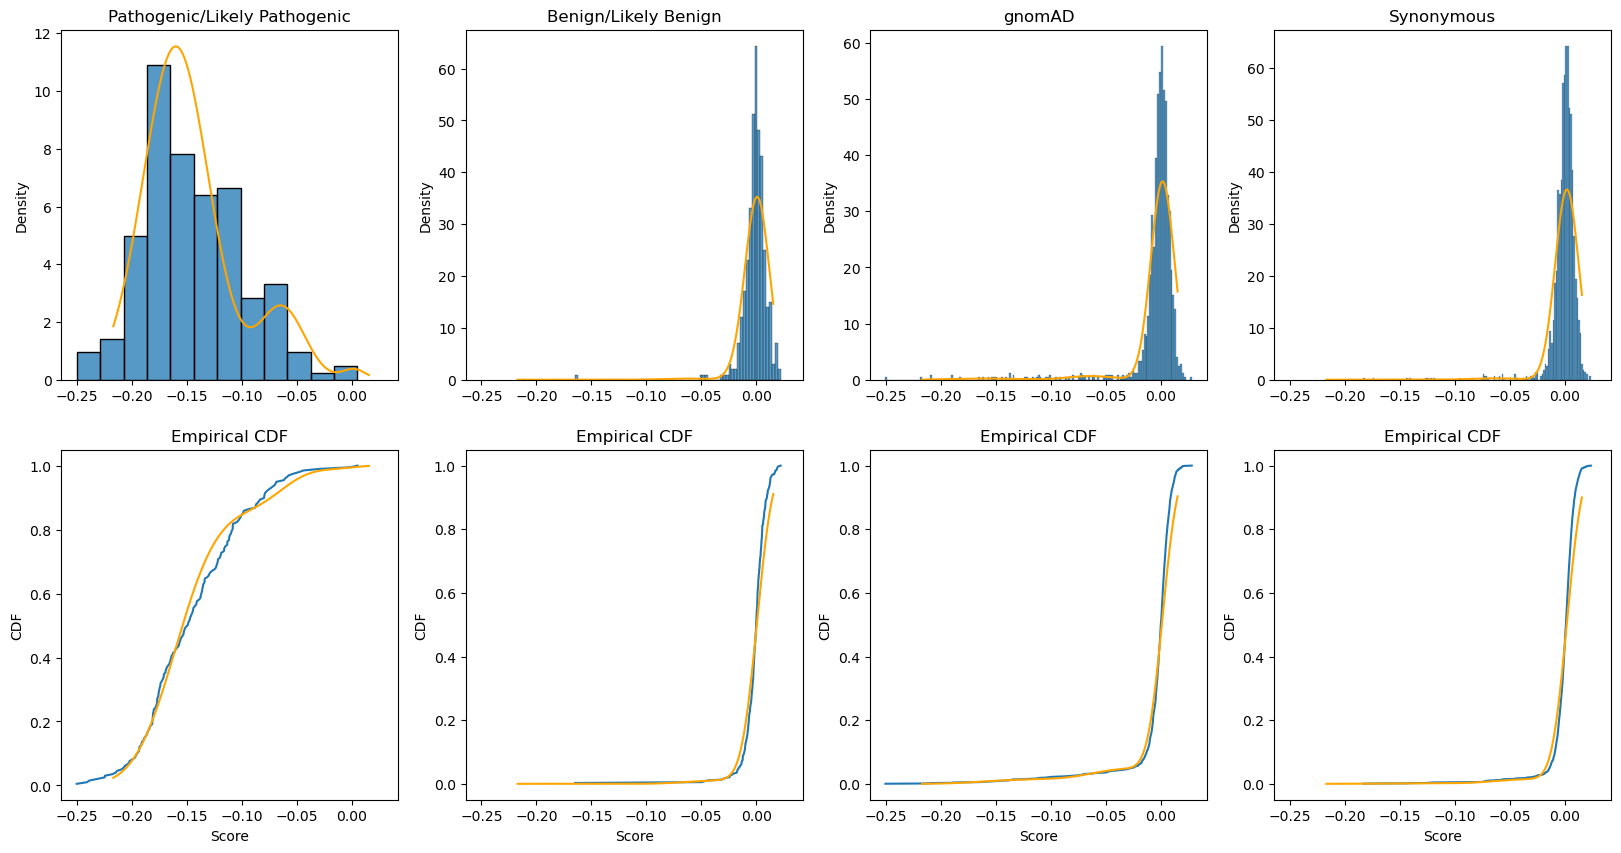

In [23]:
import scipy.stats as stats
# fN = stats.skewnorm(-0.025,loc=0.0296,scale=0.175)
# fA = stats.skewnorm(0,loc=-2.5,scale=.5)
# fB = stats.skewnorm(0,loc=-.25,scale=.5)
fig, ax = plt.subplots(2,len(list(scoreset.samples)),figsize=(20,10),sharex='row')
rng = np.linspace(np.percentile(scoreset.scores,1),np.percentile(scoreset.scores,99),1000)
for i,(sample_scores,sample_name) in enumerate(scoreset.samples):
    sns.histplot(sample_scores,ax=ax[0,i],stat='density')
    ax[0,i].set_title(f"{sample_name}")
    ax[1,i].plot(*empirical_cdf(sample_scores))
    ax[1,i].set_title("Empirical CDF")
    ax[1,i].set_xlabel("Score")
    ax[1,i].set_ylabel("CDF")
    ax[0,i].plot(rng,fit.model.get_sample_density(rng,i),color='orange')
    ax[1,i].plot(rng,fit.model.get_sample_cdf(rng,i),color='orange')


# r0 = np.arange(-4,4,.01)
# ax[0,0].plot(rng,fA.pdf(rng) * .5 + fB.pdf(rng) * .5,color='orange')
# ax[0,-2].plot(rng,fN.pdf(rng),color='orange')
# ax[0,-1].plot(rng,fN.pdf(rng),color='orange')

plt.show()

In [16]:
rng

array([-1.86955680e-01, -1.86758225e-01, -1.86560769e-01, -1.86363314e-01,
       -1.86165859e-01, -1.85968404e-01, -1.85770948e-01, -1.85573493e-01,
       -1.85376038e-01, -1.85178583e-01, -1.84981127e-01, -1.84783672e-01,
       -1.84586217e-01, -1.84388762e-01, -1.84191306e-01, -1.83993851e-01,
       -1.83796396e-01, -1.83598941e-01, -1.83401485e-01, -1.83204030e-01,
       -1.83006575e-01, -1.82809120e-01, -1.82611664e-01, -1.82414209e-01,
       -1.82216754e-01, -1.82019299e-01, -1.81821843e-01, -1.81624388e-01,
       -1.81426933e-01, -1.81229478e-01, -1.81032022e-01, -1.80834567e-01,
       -1.80637112e-01, -1.80439656e-01, -1.80242201e-01, -1.80044746e-01,
       -1.79847291e-01, -1.79649835e-01, -1.79452380e-01, -1.79254925e-01,
       -1.79057470e-01, -1.78860014e-01, -1.78662559e-01, -1.78465104e-01,
       -1.78267649e-01, -1.78070193e-01, -1.77872738e-01, -1.77675283e-01,
       -1.77477828e-01, -1.77280372e-01, -1.77082917e-01, -1.76885462e-01,
       -1.76688007e-01, -

Text(0.5, 1.0, 'Middle / Normal Density ratio')

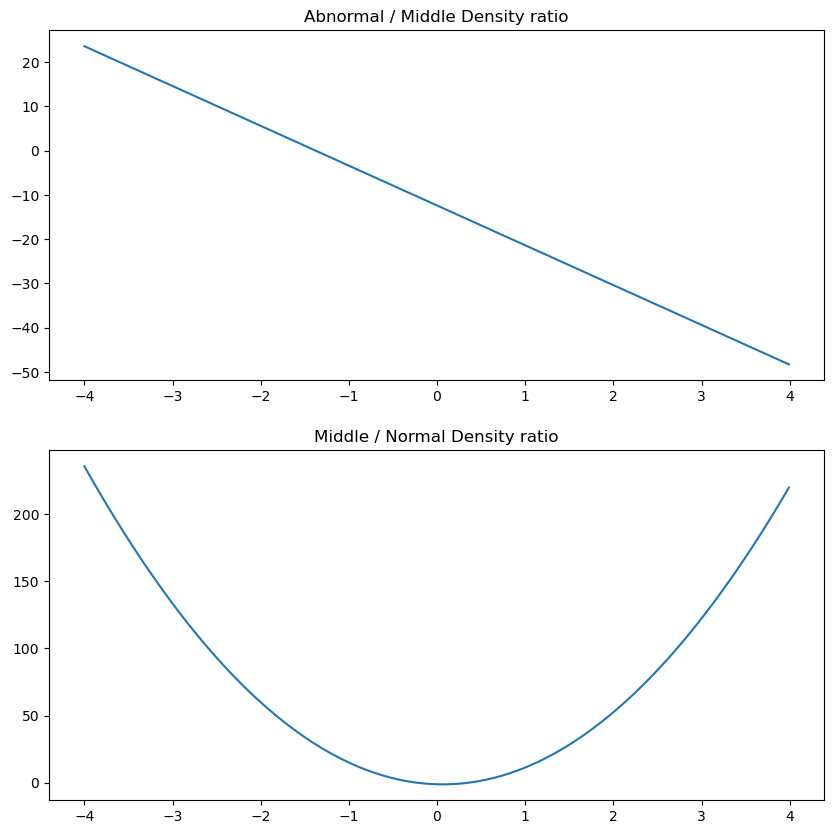

In [14]:
fig,ax = plt.subplots(2,1,figsize=(10,10))
ax[0].plot(r0,fA.logpdf(r0) - fB.logpdf(r0))
ax[0].set_title("Abnormal / Middle Density ratio")
ax[1].plot(r0,fB.logpdf(r0) - fN.logpdf(r0))
ax[1].set_title("Middle / Normal Density ratio")

In [12]:
scoreset.dataframe

,ID,Dataset,Gene,HGNC_id,Chrom,STRAND,hg19_pos,hg38_start,hg38_end,ref_allele,...,nucleotide_or_aa,MaveDB URN,Ensembl_transript_ID,Ref_seq_transcript_ID,Model_system,Assay_type,Phenotype_measured,Phenotype_detail,IGVF_produced,Flag
226706,NBN_unpublished_var151342,NBN_unpublished,NBN,7652,8,-1.0,NaN,89984500.0,89984500.0,C,...,nucleotide,NaN,ENST00000265433.8,NM_002485.5,immortalized human cells,Cell viability,Cell survival,overall function,Yes,NaN
226707,NBN_unpublished_var151343,NBN_unpublished,NBN,7652,8,-1.0,NaN,89984500.0,89984500.0,C,...,nucleotide,NaN,ENST00000265433.8,NM_002485.5,immortalized human cells,Cell viability,Cell survival,overall function,Yes,NaN
226708,NBN_unpublished_var151344,NBN_unpublished,NBN,7652,8,-1.0,NaN,89984500.0,89984500.0,C,...,nucleotide,NaN,ENST00000265433.8,NM_002485.5,immortalized human cells,Cell viability,Cell survival,overall function,Yes,NaN
226709,NBN_unpublished_var151345,NBN_unpublished,NBN,7652,8,-1.0,NaN,89984501.0,89984501.0,C,...,nucleotide,NaN,ENST00000265433.8,NM_002485.5,immortalized human cells,Cell viability,Cell survival,overall function,Yes,NaN
226710,NBN_unpublished_var151346,NBN_unpublished,NBN,7652,8,-1.0,NaN,89984501.0,89984501.0,C,...,nucleotide,NaN,ENST00000265433.8,NM_002485.5,immortalized human cells,Cell viability,Cell survival,overall function,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229792,NBN_unpublished_var154428,NBN_unpublished,NBN,7652,8,-1.0,NaN,89958782.0,89958782.0,G,...,nucleotide,NaN,ENST00000265433.8,NM_002485.5,immortalized human cells,Cell viability,Cell survival,overall function,Yes,NaN
229793,NBN_unpublished_var154429,NBN_unpublished,NBN,7652,8,-1.0,NaN,89958782.0,89958782.0,G,...,nucleotide,NaN,ENST00000265433.8,NM_002485.5,immortalized human cells,Cell viability,Cell survival,overall function,Yes,NaN
229794,NBN_unpublished_var154430,NBN_unpublished,NBN,7652,8,-1.0,NaN,89958783.0,89958783.0,C,...,nucleotide,NaN,ENST00000265433.8,NM_002485.5,immortalized human cells,Cell viability,Cell survival,overall function,Yes,NaN
229795,NBN_unpublished_var154431,NBN_unpublished,NBN,7652,8,-1.0,NaN,89958783.0,89958783.0,C,...,nucleotide,NaN,ENST00000265433.8,NM_002485.5,immortalized human cells,Cell viability,Cell survival,overall function,Yes,NaN
